# Problem Definition 

Breast cancer is one of the main causes of cancer death worldwide. Early diagnostics significantly increases the chances of correct treatment and survival, but this process is tedious and often leads to a disagreement between pathologists. Computer-aided diagnosis systems showed the potential for improving diagnostic accuracy. But early detection and prevention can significantly reduce the chances of death. It is important to detect breast cancer as early as possible.Breast cancer is a cancer in which the cells of breast tissue get altered and undergo uncontrolled division, resulting in a lump or mass in that region. It is generally diagnosed as one of the two types:

- Benign (Non-cancerous)

- Malignant (Cancerous)

# Brief on the dataset used: the Wisconsin breast cancer diagnostic data set for predictive analysis



Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)


---



Ten real-valued features are computed for each cell nucleus:


1) ID number

2) Diagnosis (M = malignant, B = benign)

3–32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter² / area — 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension (“coastline approximation” — 1)

All columns contain numerical data except the “diagnosis” attribute. This diagnosis attribute contains cancer type, i.e.- M(for malignant) or B(for benign), it is text data.





# Python packages



- Numpy                   v1.19.1

- Matplotlib               v3.3.1

- Plotly                     v4.9.0

- Seaborn                 v0.10.1

- Sci-kit learn            v0.23.2

Numpy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.
Besides its obvious scientific uses, Numpy can also be used as an efficient multi-dimensional container of generic data.

Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays.One of the greatest benefits of visualization is that it allows us visual access to huge amounts of data in easily digestible visuals. Matplotlib consists of several plots like line, bar, scatter, histogram etc.

The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

Seaborn is a library mostly used for statistical plotting in Python. It is built on top of Matplotlib and provides beautiful default styles and color palettes to make statistical plots more attractive.

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

# Importing the necessary libraries

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots


#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [ ]:
import seaborn as sns
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Load the data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
p = 'data.csv'
df = pd.read_csv(p)
print(df.shape)

(569, 33)


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Pre-processing:

Numerical data  

*   Normalization
*   Standardization
*   Inputing Missing values
*   Discretization

# Normalization

In [ ]:
from sklearn import preprocessing

Removing unwanted attributes such as 'id' since id is not relevant in prediction of breast cancer.
Removing attribute 'unnamed' as well since NaN value.

In [ ]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


o Text data 


*   Text related preprocessing (stop words removal, word stemming)
*   Conversionof text data to numeric (Tf-idf),

---


Note:[Use python nltk package –eg: vectorization]





In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Assigned M - malignant the numeric value 1 and B - benign the value 0

# Standardization

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('compactness_worst', axis=1),
                                                    df['compactness_worst'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([3.74371859e-01, 1.41855000e+01, 1.91928392e+01, 9.23355025e+01,
       6.61859045e+02, 9.64749497e-02, 1.04080000e-01, 8.87943058e-02,
       4.94785528e-02, 1.80698241e-01, 6.26464573e-02, 4.09096231e-01,
       1.20445829e+00, 2.86661859e+00, 4.13843643e+01, 6.98354020e-03,
       2.50993719e-02, 3.12257678e-02, 1.16784749e-02, 2.04023819e-02,
       3.73508116e-03, 1.63596206e+01, 2.55345226e+01, 1.07736030e+02,
       8.94246985e+02, 1.32529045e-01, 2.68530796e-01, 1.15221410e-01,
       2.89186935e-01, 8.37181407e-02])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.773559,-0.749980,-1.099787,-0.741586,-0.701887,0.584593,-0.427726,-0.457550,-0.760550,-0.099860,...,-0.045963,-0.798483,-0.591967,-0.746602,-0.714529,0.116328,-0.046272,-0.623597,0.077542,0.450628
1,-0.773559,-1.028214,-0.139262,-1.029804,-0.894732,0.742882,-0.731843,-0.843301,-0.808805,-1.159759,...,-0.158707,-1.068703,-0.161981,-1.074343,-0.868941,0.382001,-0.954894,-0.761238,-1.071453,-0.295414
2,-0.773559,-0.538522,-0.299349,-0.568574,-0.550561,-0.714814,-0.731647,-0.639856,-0.668125,0.581758,...,-0.474919,-0.558512,-0.051227,-0.614110,-0.552748,-0.471637,-0.384602,-0.504704,0.349008,-0.133716
3,1.292726,1.147577,-0.146430,1.061698,1.035628,-0.762301,-0.380637,-0.091016,0.221141,-0.663712,...,-1.005230,0.998276,0.134448,0.914190,0.863760,-0.397597,0.441794,0.638339,0.495789,-0.799466
4,-0.773559,-2.004538,-1.376954,-1.962370,-1.415904,1.476766,-0.557221,-1.137578,-1.263267,0.439011,...,0.138526,-1.699888,-0.976348,-1.665615,-1.187480,1.126757,-1.391304,-1.756275,0.063338,0.563260


# Discretization

In [ ]:
df['binned']=pd.cut(x=df['radius_worst'], bins=[0,25,50,100,200])

In [ ]:
df.head

<bound method NDFrame.head of      diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840      

In [ ]:
df['height_bin']=pd.cut(x = df['radius_mean'],
                        bins = [0,25,50,100,200], 
                        labels = [0, 1, 2,3])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,binned,height_bin
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,"(25, 50]",0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,"(0, 25]",0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,"(0, 25]",0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,"(0, 25]",0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,"(0, 25]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,"(25, 50]",0
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,"(0, 25]",0
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,"(0, 25]",0
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,"(25, 50]",0


In [ ]:

df['height_bin']=pd.cut(x=df['radius_mean'], bins=[0,25,50,100,200], 
                        labels=[ " very small", "small","medium","huge",])
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0         0.2419  ...           184.60      

# •Data Summarization:



*   Use statistical methods to understand the data and apply the required methods








For instance, we can calculate various statistics on all numeric columns with just one function: describe():



In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


A data summary in Python can be created for a specific part of the DataFrame. We just need to filter the relevant part before applying the functions.

We group the rows by the distinct values in a column with the groupby() function. The following code groups the rows by product group.

In [ ]:
df.groupby("diagnosis")

Once the groups are formed, we can calculate any statistic and describe or summarize the data. 


In [ ]:
df.groupby("diagnosis")["radius_mean"].mean()

diagnosis
0    12.146524
1    17.462830
Name: radius_mean, dtype: float64

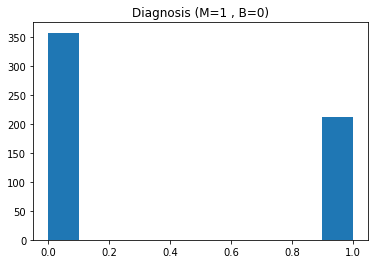

In [ ]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

# Data Visualization:




*   Visualize the data using various plots like scatterplot, histograms, box plot etc and record your interpretations with varying values



# Historgram

A histogram is used to check the data distribution of numeric columns. It divides the entire value range into discrete bins and counts the number of values in each bin. As a result, we get an overview of the distribution of the data.

(array([ 93., 251., 101.,  47.,  51.,  14.,   6.,   3.,   1.,   2.]),
 array([ 143.5 ,  379.25,  615.  ,  850.75, 1086.5 , 1322.25, 1558.  ,
        1793.75, 2029.5 , 2265.25, 2501.  ]),
 <a list of 10 Patch objects>)

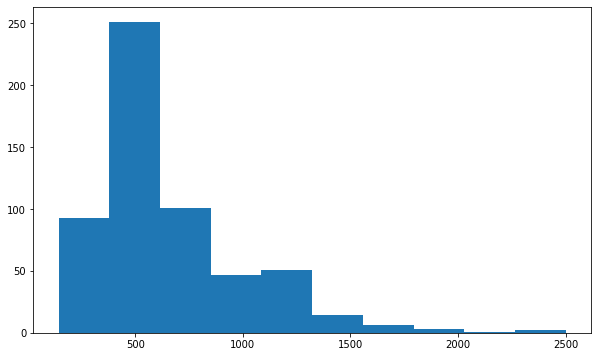

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df["area_mean"], bins=10)

In [ ]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,binned,height_bin
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,"(25, 50]",very small
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,"(0, 25]",very small


# Line plot

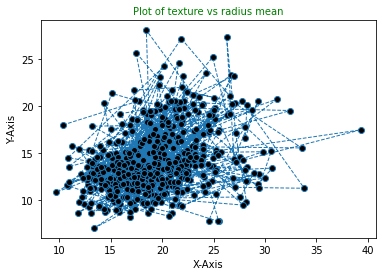

In [ ]:

# plotting the data
texture = df ['texture_mean'].tolist()
meanofradius  = df ['radius_mean'].tolist()
plt.plot(texture, meanofradius, 
       marker='o', markerfacecolor='k', 
      linestyle='--', linewidth=1)
 
# Adding title to the plot
plt.title("Plot of texture vs radius mean", fontsize=10, color="green")
 
# Adding label on the y-axis
plt.ylabel('Y-Axis')
 
# Adding label on the x-axis
plt.xlabel('X-Axis')
 
plt.show()

# Scatter plot

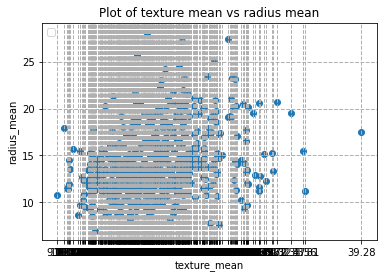

In [ ]:
texture  = df ['texture_mean'].tolist()
meanofradius = df ['radius_mean'].tolist()
plt.scatter(texture, meanofradius)
plt.xlabel('texture_mean')
plt.ylabel('radius_mean')
plt.legend(loc='upper left')
plt.title('Plot of texture mean vs radius mean')
plt.xticks(texture)
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()

# nucleus features vs diagnosis

In [ ]:
features_mean=list(df.columns[1:11])

dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

# Stack the data

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



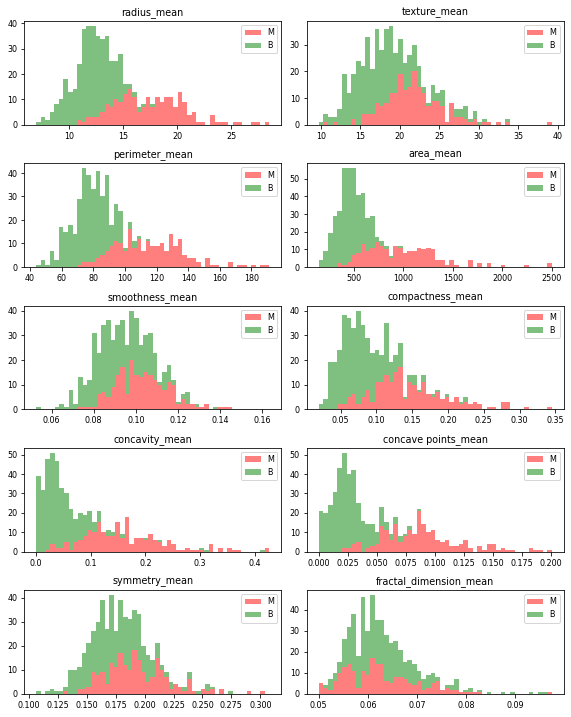

In [ ]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True,  label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

# Observations


1.  mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
 2.  mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

In [ ]:
import plotly.graph_objs as go

In [ ]:
import seaborn as sns

# Positive correlated features

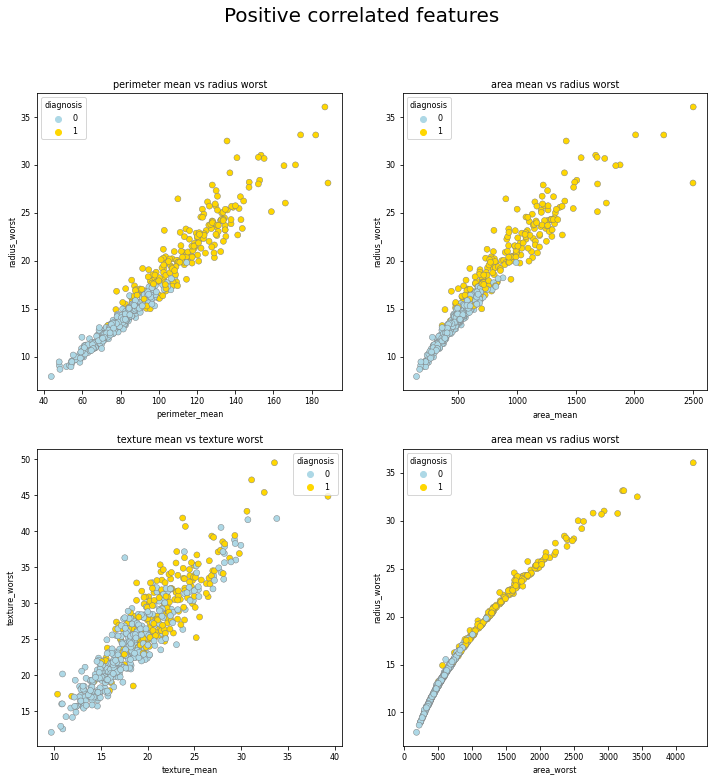

In [ ]:
#seaborn version : 

palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['perimeter_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['area_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = df['texture_mean'], y = df['texture_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = df['area_worst'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

# Box plot

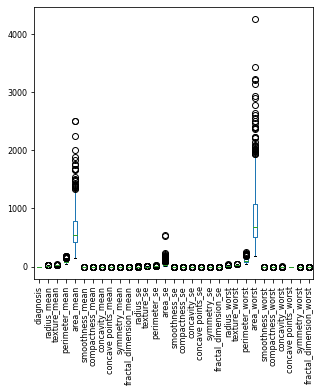

In [ ]:
boxplot = df.boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)


# Data Interpretation
Record all your findings and summary about data 





Creating a test set and a training set

Since this data set is not ordered, I am going to do a simple 70:30 split to create a training data set and a test data set.

In [ ]:
traindf, testdf = train_test_split(df, test_size = 0.3)

# Model Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [ ]:
#Generic function for making a classification model and accessing the performance. 
from sklearn.model_selection import cross_validate
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

 

In [ ]:
 #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_splits=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

IndentationError: ignored

# Logistic Regression model

Logistic regression is widely used for classification of discrete data. In this case we will use it for binary (1,0) classification.

Based on the observations in the histogram plots, we can reasonably hypothesize that the cancer diagnosis depends on the mean cell radius, mean perimeter, mean area, mean compactness, mean concavity and mean concave points. We can then perform a logistic regression analysis using those features as follows:

In [ ]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 90.201%


The prediction accuracy is reasonable. What happens if we use just one predictor? Use the mean_radius:

In [ ]:
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 88.693%


The accuracy of the predictions are good but not great. 

# Decision Tree Model

In [ ]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%


Here we are over-fitting the model probably due to the large number of predictors. Let use a single predictor, the obvious one is the radius of the cell.

In [ ]:
predictor_var = ['radius_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 97.487%


The accuracy of the prediction is much much better here. But does it depend on the predictor?

Using a single predictor gives a 97% prediction accuracy for this model but the cross-validation score is not that great.

# Random Forest

In [ ]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 95.477%


Using all the features improves the prediction accuracy and the cross-validation score is great.

An advantage with Random Forest is that it returns a feature importance matrix which can be used to select features. So lets select the top 5 features and use them as predictors.

In [ ]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.262893
area_mean                 0.169839
perimeter_mean            0.150254
radius_mean               0.146332
concavity_mean            0.105571
compactness_mean          0.068147
texture_mean              0.046892
smoothness_mean           0.027270
symmetry_mean             0.012531
fractal_dimension_mean    0.010271
dtype: float64


In [ ]:
# Using top 5 features
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 94.975%


Using the top 5 features only changes the prediction accuracy a bit but I think we get a better result if we use all the predictors.

What happens if we use a single predictor as before? Just check.

In [ ]:
predictor_var =  ['radius_mean']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 97.487%


This gives a better prediction accuracy too but the cross-validation is not great.

# Using on the test data set




In [ ]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdf,predictor_var,outcome_var)

Accuracy : 94.152%


The prediction accuracy for the test data set using the above Random Forest model is 97%

# Conclusion

The best model to be used for diagnosing breast cancer as found in this analysis is the Random Forest model with the top 5 predictors, 'concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean'. It gives a prediction accuracy of ~95% and a cross-validation score ~ 93% for the test data set.

I will see if I can improve this more by tweaking the model further and trying out other models in a later version of this analysis.

# Downloading the final dataset

In [ ]:
from google.colab import files
df.to_csv('finaldata.csv') 
files.download('finaldata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>